In [1]:
#Description: This program predict the price of  Google stock for a Specific day

In [2]:
#import the liberies
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('seaborn-darkgrid')

In [3]:
#load the data
df= yf.Ticker('GOOG').history(start='2019-05-2',end='2019-05-31')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-05-01,59.402500,59.402500,58.359001,58.403999,52784000,0,0
2019-05-02,58.388000,58.709499,57.750099,58.130501,38896000,0,0
2019-05-03,58.682499,59.340000,58.450001,59.270000,39614000,0,0
2019-05-06,58.313000,59.542500,58.313000,59.469501,31278000,0,0
2019-05-07,59.023499,59.521999,58.051998,58.705002,31028000,0,0
2019-05-08,58.600498,59.021198,58.286999,58.313499,26186000,0,0
2019-05-09,57.951500,58.483002,57.542500,58.118999,23714000,0,0
2019-05-10,58.179501,58.630001,57.125000,58.213501,26290000,0,0
2019-05-13,57.098000,57.396999,56.105499,56.601501,37212000,0,0


In [4]:
actual_price=df.tail(1)
actual_price

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-05-30,55.777,56.156502,55.605999,55.897499,19038000,0,0


In [5]:
#Prepare the data for training
df=df.head(len(df)-1)
df=df.reset_index()

In [6]:
#create an empty list to stor the independent and dependent data
days=list()
close=list()

In [7]:
#Get the data and the adjusted close price
df_days=df.loc[:,'Date']
df_days

0    2019-05-01
1    2019-05-02
2    2019-05-03
3    2019-05-06
4    2019-05-07
5    2019-05-08
6    2019-05-09
7    2019-05-10
8    2019-05-13
9    2019-05-14
10   2019-05-15
11   2019-05-16
12   2019-05-17
13   2019-05-20
14   2019-05-21
15   2019-05-22
16   2019-05-23
17   2019-05-24
18   2019-05-28
19   2019-05-29
Name: Date, dtype: datetime64[ns]

In [8]:
df_close=df.loc[:,'Close']
df_close

0     58.403999
1     58.130501
2     59.270000
3     59.469501
4     58.705002
5     58.313499
6     58.118999
7     58.213501
8     56.601501
9     56.021999
10    58.210499
11    58.949001
12    58.115002
13    56.942501
14    57.481499
15    57.570999
16    57.038502
17    56.673500
18    56.707500
19    55.823002
Name: Close, dtype: float64

In [9]:
#Create the independant data set
for day in df_days:
    day=str(day)
    days.append([int((day.split('-')[2]).split(' ')[0])])
#create the dependent data set
for Close in df_close:
    close.append(float(Close))

days
#close

[[1],
 [2],
 [3],
 [6],
 [7],
 [8],
 [9],
 [10],
 [13],
 [14],
 [15],
 [16],
 [17],
 [20],
 [21],
 [22],
 [23],
 [24],
 [28],
 [29]]

In [10]:
#Create the 3 Support Vector Regression Models

#create and train a SVR Model Using Linear kernel
lin_svr=SVR(kernel='linear',C=1000.0)
lin_svr.fit(days,close)

#create and train a SVR Model Using a polynomial kernel
poly_svr=SVR(kernel='poly',C=1000.0,degree=2)
poly_svr.fit(days,close)

#create and train a SVR Model Using a rbf kernel
rbf_svr=SVR(kernel='rbf',C=1000.0,gamma=0.05)
rbf_svr.fit(days,close)

SVR(C=1000.0, gamma=0.05)

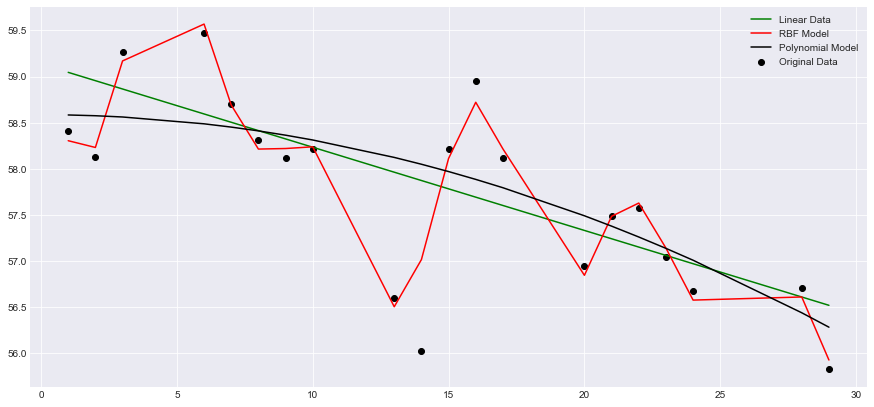

In [11]:
#plot the model o0 a graph to see which has the best fit ti the original data
plt.figure(figsize=(15,7))
plt.scatter(days,close,color='black',label='Original Data')
plt.plot(days,lin_svr.predict(days),color='green',label='Linear Data')
plt.plot(days,rbf_svr.predict(days),color='red',label='RBF Model')
plt.plot(days,poly_svr.predict(days),color='K',label='Polynomial Model')
plt.legend()
plt.show()